In [1]:
# Results of TF-IDF on questions set, instead of questions list. 
# Faster algorithm (Computations on 131 questions instead of 17742 ones)
# More meaningful features:
# ['19', 'covid', 'get', 'risk', 'vaccin', 'wait']
# VS 
# ['follow', 'know', 'medic', 'medicin', 'name', 'special', 'use']
# But still poor clustering results due to lack of language model in this algorithm.

In [2]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')


# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
import re
from nltk.stem.snowball import SnowballStemmer


import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import codecs
import os
import random

import string
# from hazm import Lemmatizer , Normalizer
# from hazm import Normalizer as hazm_norm
# from parsivar import Tokenizer , FindStems

import sklearn as sk
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.tokenize import regexp_tokenize , word_tokenize 
# from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from hazm import Normalizer, Lemmatizer, WordTokenizer, InformalNormalizer


import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')



import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/asus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/asus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/asus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Data


#####Dataset:  17743 rows × 5 columns
#####Uniqu drug Number :  1616
#####Unique question Number:  139

In [3]:
import pandas as pd
df = pd.read_csv('../../dataset_files/drug_dataset.csv')
df = pd.DataFrame(df)
# df.head(3)
content = df['title']
df['title'] = content 
df['title']
# contect.head(3)

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [4]:
df.head(3)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...


##Preprocess

#####Lower 
#####Remove punc
#####Remove stop word
#####Stemming

In [5]:
df["question"] = df["title"].str.lower()#.str.split()
df["question"] = df["question"].str.replace('[^\w\s]',' ')
df["question"]

<ipython-input-5-0a08de22655b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["question"] = df["question"].str.replace('[^\w\s]',' ')


0                       why is this medication prescribed 
1                        how should this medicine be used 
2                             other uses for this medicine
3                what special precautions should i follow 
4        what special dietary instructions should i fol...
                               ...                        
17738                what other information should i know 
17739                                          brand names
17740                        in case of emergency overdose
17741                what other information should i know 
17742                                          brand names
Name: question, Length: 17743, dtype: object

In [6]:
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["question"] = df["question"].apply(lambda x: [item for item in w_tokenizer.tokenize(x) if item not in stop])
df["question"]

0                        [medication, prescribed]
1                                [medicine, used]
2                                [uses, medicine]
3                  [special, precautions, follow]
4        [special, dietary, instructions, follow]
                           ...                   
17738                         [information, know]
17739                              [brand, names]
17740                 [case, emergency, overdose]
17741                         [information, know]
17742                              [brand, names]
Name: question, Length: 17743, dtype: object

In [7]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['question'] = df["question"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
df['question']

0                           [medic, prescrib]
1                              [medicin, use]
2                              [use, medicin]
3                  [special, precaut, follow]
4        [special, dietari, instruct, follow]
                         ...                 
17738                          [inform, know]
17739                           [brand, name]
17740                  [case, emerg, overdos]
17741                          [inform, know]
17742                           [brand, name]
Name: question, Length: 17743, dtype: object

In [8]:
df.head(3)

,Section_Number,Link,drug_name,title,text,question
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,"[medic, prescrib]"
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,"[medicin, use]"
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,"[use, medicin]"


In [9]:
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['question'].apply(_remove)
df['question'] = pd.DataFrame(z)
df['question'].head(3)

0    medic prescrib
1       medicin use
2       use medicin
Name: question, dtype: object

In [10]:
question_set = set(df['question'])
question_list = list(question_set)
len(question_list)

131

In [11]:
x = df.iloc[:,5]
# x = df
print(x.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Create the vectorizer
x_tfidf = TfidfVectorizer().fit(x).transform(x)
tfidf_vectorizer = TfidfVectorizer(min_df=0.09, max_df=0.8)
tfidf = tfidf_vectorizer.fit_transform(question_list)
terms = tfidf_vectorizer.get_feature_names()

print(tfidf_vectorizer.get_feature_names()[:10])
print(len(tfidf_vectorizer.get_feature_names()))
print(tfidf.shape)


print("tfidf shape: ",tfidf.shape , type(tfidf) )
print("terms",len(terms),type(terms))  #list of words

(17743,)
['19', 'covid', 'get', 'risk', 'vaccin', 'wait']
6
(131, 6)
tfidf shape:  (131, 6) <class 'scipy.sparse.csr.csr_matrix'>
terms 6 <class 'list'>


In [12]:
x_tfidf.shape

(17743, 119)

###########################################

##Find best n for cluster
#Elbow Method

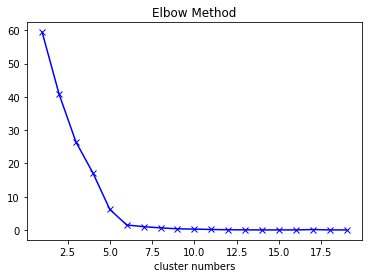

In [13]:
# Using elbow method to determine number of cluster
from sklearn.cluster import MiniBatchKMeans

K = range(1,20)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 50)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [14]:
clust=MiniBatchKMeans(n_clusters=8, batch_size=50)
clust.fit(tfidf)  
centers = clust.cluster_centers_.argsort()[:,::-1]

In [15]:
type(centers) , centers.shape #Yani 6 ta claster dar har celaster 7 ta dacument mojood hast

(numpy.ndarray, (8, 6))

In [16]:
centers

array([[5, 2, 4, 3, 1, 0],
       [5, 4, 3, 2, 1, 0],
       [4, 5, 3, 2, 1, 0],
       [3, 4, 5, 2, 1, 0],
       [1, 0, 4, 5, 3, 2],
       [2, 4, 5, 3, 1, 0],
       [2, 5, 4, 3, 1, 0],
       [1, 0, 3, 4, 5, 2]])

In [17]:
len(centers[0])

6

In [18]:
centers[0,:15]
centers[1,:15]

array([5, 4, 3, 2, 1, 0])

In [19]:
from sklearn.cluster import KMeans

# Using MiniBatchKMean to cluster
n_clusters = 8

# for nc in n_clusters:
clust = KMeans(n_clusters=n_clusters,max_iter=100,precompute_distances="auto",n_jobs=-1)
clust.fit(tfidf)
centers = clust.cluster_centers_.argsort()[:,::-1]
print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
for i in range(0,n_clusters):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 
# evaluate(clust, tfidf)

Len of Labels:  8  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
cluster0:
['wait', 'vaccin', 'risk', 'get', 'covid', '19']
cluster1:
['vaccin', 'wait', 'risk', 'get', 'covid', '19']
cluster2:
['get', 'vaccin', 'wait', 'risk', 'covid', '19']
cluster3:
['risk', 'vaccin', 'wait', 'get', 'covid', '19']
cluster4:
['covid', '19', 'vaccin', 'wait', 'risk', 'get']
cluster5:
['wait', 'get', 'vaccin', 'risk', 'covid', '19']
cluster6:
['covid', '19', 'risk', 'vaccin', 'wait', 'get']
cluster7:
['risk', 'wait', 'vaccin', 'get', 'covid', '19']


/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [20]:
# Using MiniBatchKMean to cluster
n_clusters = 8
nc = n_clusters
init = ['k-means++']

# for nc in n_clusters:
for ini in init:
    clust=MiniBatchKMeans(n_clusters=nc, init=ini, batch_size=50)
    clust.fit(tfidf)
    centers = clust.cluster_centers_.argsort()[:,::-1]
    print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
    for i in range(0,nc):
        word_list=[]
        print("cluster%d:"% i)
        for j in centers[i,:15]:
            word_list.append(terms[j])
        print(word_list) 
    # evaluate(clust, tfidf)

Len of Labels:  8  Params:  {'batch_size': 50, 'compute_labels': True, 'init': 'k-means++', 'init_size': None, 'max_iter': 100, 'max_no_improvement': 10, 'n_clusters': 8, 'n_init': 3, 'random_state': None, 'reassignment_ratio': 0.01, 'tol': 0.0, 'verbose': 0}
cluster0:
['covid', '19', 'vaccin', 'wait', 'risk', 'get']
cluster1:
['vaccin', 'wait', 'risk', 'get', 'covid', '19']
cluster2:
['wait', 'vaccin', 'risk', 'get', 'covid', '19']
cluster3:
['get', 'vaccin', 'wait', 'risk', 'covid', '19']
cluster4:
['risk', 'vaccin', 'wait', 'get', 'covid', '19']
cluster5:
['wait', 'get', 'vaccin', 'risk', 'covid', '19']
cluster6:
['covid', '19', 'risk', 'vaccin', 'wait', 'get']
cluster7:
['risk', 'wait', 'vaccin', 'get', 'covid', '19']


##Kmeand & Visualize
https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

['19', 'covid', 'get', 'risk', 'vaccin', 'wait']
6
(131, 6)
Lables:  [1 1 1 0 1 0 1 4 1 1 2 1 1 0 4 1 2 5 2 3 1 0 1 5 0 5 5 1 2 3 2 1 1 4 1 5 1
 1 1 4 2 3 1 3 4 0 0 3 1 0 1 5 1 4 0 1 0 1 4 1 0 0 2 0 1 3 0 1 1 1 1 1 1 3
 3 6 4 2 2 1 0 2 0 4 2 5 0 5 0 0 5 1 5 3 0 4 0 0 1 7 2 1 1 0 6 3 1 5 2 0 1
 5 1 1 5 0 7 5 2 3 0 5 1 0 0 1 3 3 1 2 1]


/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


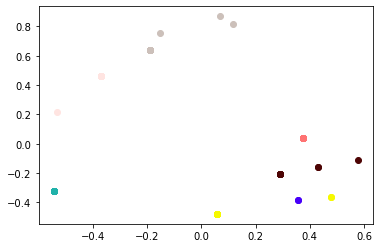

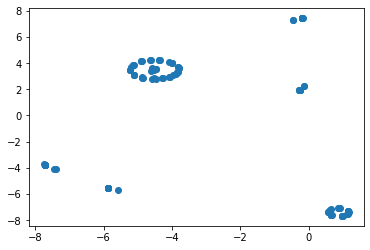

In [21]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 8
num_seeds = 10
max_iterations = 100
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#f6f900', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
# tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
x_tfidf = TfidfVectorizer().fit(question_list).transform(question_list)
tf_idf_vectorizer = TfidfVectorizer(min_df=0.09, max_df=0.8)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(question_list)
terms = tf_idf_vectorizer.get_feature_names()
print(tf_idf_vectorizer.get_feature_names()[:10])
print(len(tf_idf_vectorizer.get_feature_names()))
print(tf_idf_matrix.shape)
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
print("Lables: ",labels )
# print labels

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print("reduced_data: ", reduced_data)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

https://stackoverflow.com/questions/57626286/how-to-plot-text-clusters

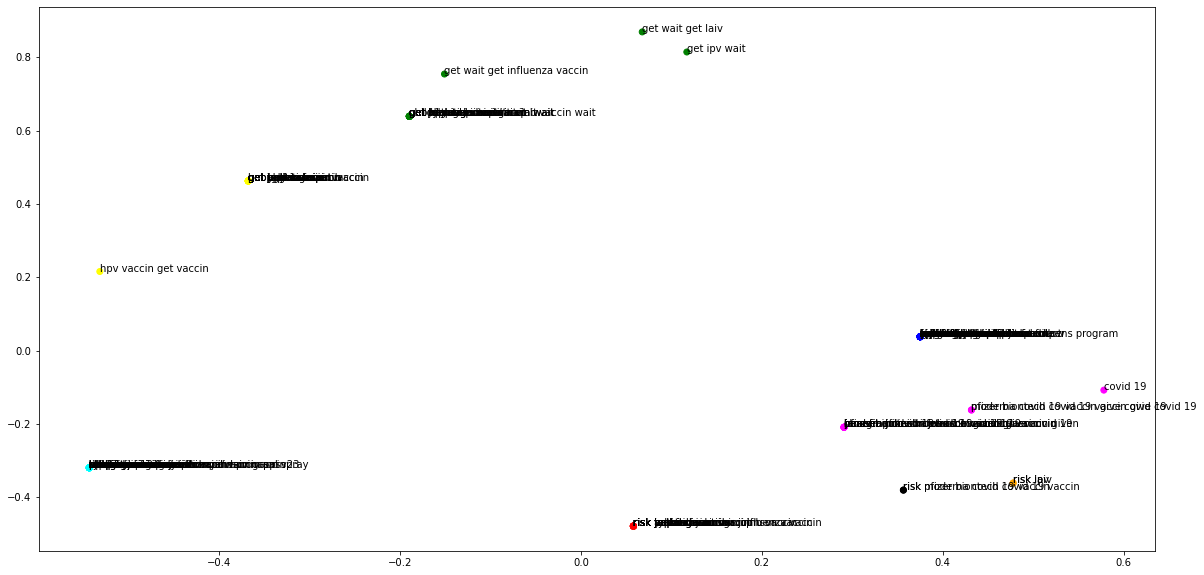

In [22]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


x_tfidf = TfidfVectorizer().fit(question_list).transform(question_list)
tf_idf_vectorizer = TfidfVectorizer(min_df=0.09, max_df=0.8)
vectors = tf_idf_vectorizer.fit_transform(question_list)

# vectors = cv.fit_transform(tf_idf_vectorizer)
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["red", "blue", "cyan", "yellow", "magenta", "green", "black", "orange"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(question_list):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

##Data Lablelling

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
df["intent"] = ""

# Initializing KMeans
kmeans = KMeans(n_clusters=8)
# Fitting with inputs
kmeans = kmeans.fit(tfidf)
# Predicting the clusters
labels = kmeans.predict(tfidf)
print("Lables: ", len(labels) )
for i in range(len(labels)):
  # df["intent"][i]  = labels[i]
  print(df.title[i] , labels[i]) 
# Getting the cluster centers

print("**************************************************")
# C = kmeans.cluster_centers_
# print((C))

########################################################### 

# fig = plt.figure()
# ax = Axes3D(fig)
# # ax.scatter(tf_idf_matrix[:, 0], tf_idf_matrix[:, 1], tf_idf_matrix[:, 2], c=Y)
# ax.scatter(C[:, 0], C[:, 1], C[:,4], marker="*", c="#050505", s=1000)

Lables:  131
Why is this medication prescribed? 2
How should this medicine be used? 2
Other uses for this medicine 2
What special precautions should I follow? 1
What special dietary instructions should I follow? 2
What should I do if I forget a dose? 1
What side effects can this medication cause? 2
Why is this medication prescribed? 4
How should this medicine be used? 2
Other uses for this medicine 2
What special precautions should I follow? 5
What special dietary instructions should I follow? 2
What side effects can this medication cause? 2
In case of emergency/overdose 1
What other information should I know? 4
IMPORTANT WARNING:  2
Why is this medication prescribed? 5
How should this medicine be used? 0
Other uses for this medicine 5
What special precautions should I follow? 3
What special dietary instructions should I follow? 2
What side effects can this medication cause? 1
Why is this medication prescribed? 2
How should this medicine be used? 0
Other uses for this medicine 1
What s